In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from lifelines import CoxPHFitter, KaplanMeierFitter
import scipy.stats as stats
from statsmodels.stats.multitest import fdrcorrection
from lifelines.statistics import logrank_test

# Data reading

In [2]:
data = pd.read_csv("../summary_data/sbt_features_oncopanel.csv")
data = data.set_index('Sample ID')
data['time'] = data['tstop'] - data['tstart']

In [3]:
feature_dict_names = {'mtDNA_dosage_norm':'mtDNA copy number', '5S_dosage_norm':'5S rDNA copy number', 
                      '18S_dosage_norm':'18S rDNA copy number', '28S_dosage_norm':'28S rDNA copy number', 
                      '45S_dosage_norm':'45S rDNA copy number', 'n_fungi_norm':'fungal load', 
                      'n_microbial_norm':'microbial load', 'n_protozoa_norm':'protozoa load', 
                      'n_viral_norm':'viral load', 'loadIG_ligth_chain_norm':'IG κ and λ infiltration', 
                      'loadIG_norm':'BCR infiltration', 'loadIGH_norm':'IGH infiltration', 
                      'loadIGK_norm':'IG κ infiltration', 'loadIGL_norm':'IG λ infiltration', 
                      'loadTCR_norm':'T cell infiltration', 'loadTCRA_norm':'T cell α infiltration', 
                      'loadTCRB_norm':'T cell β infiltration', 'loadTCRD_norm':'T cell δ infiltration',
                      'loadTCRG_norm':'T cell γ infiltration', 'nIG_ligth_chain_norm':'IG κ and λ richness', 
                      'nIG_norm':'BCR richness', 'nIGH_norm':'IGH richness', 'nIGK_norm':'IG κ richness', 
                      'nIGL_norm':'IG λ richness', 'nTCR_norm':'TCR richness', 'nTCRA_norm':'TCR α richness', 
                      'nTCRB_norm':'TCR β richness', 'nTCRD_norm':'TCR δ richness', 'nTCRG_norm':'TCR γ richness',
                      'alphaIGH':'IGH Shannon', 'alphaIGK':'IG κ Shannon', 'alphaIGL':'IG λ Shannon', 
                      'alphaTCRA':'TCR α Shannon', 'alphaTCRB':'TCR β Shannon', 'alphaTCRD':'TCR δ Shannon', 
                      'alphaTCRG':'TCR γ Shannon'}

# Fig 4a - Kaplan-Meier 5S rDNA copy number (OP-LUAD)

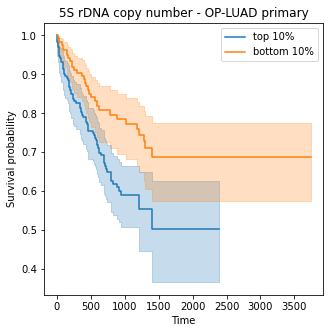

p-value:  0.002091351338556354


In [16]:
data_ = data.loc[data['Primary Cancer Diagnosis'] == 'Lung Adenocarcinoma', ]
data_ = data_.loc[data['Biopsy Site Type'] == 'PRIMARY', ]

data_rank = data_.copy()

feature='5S_dosage_norm' 
N = data_rank.shape[0]
    
data_rank['rank_'+feature] = data_rank[feature].rank(method='first').reindex_like(data_rank[feature])/N

bottom_10 = data_rank['rank_'+feature] <= 0.1
top_10 = data_rank['rank_'+feature] >= 0.9

fig, ax = plt.subplots(1)
fig = plt.gcf()
fig.set_size_inches(5,5)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(data_.loc[top_10]['time'], data_.loc[top_10]['event'], label='top 10%').plot(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(data_.loc[bottom_10]['time'], data_.loc[bottom_10]['event'], label='bottom 10%').plot(ax=ax)

plt.ylabel('Survival probability')
ax.set_xlabel("Time")
plt.title(feature_dict_names[feature] +" - OP-LUAD primary")
plt.savefig('../figures/Fig4a_survival_kaplan-meier.png', bbox_inches='tight')
plt.show()


results = logrank_test(data_.loc[top_10]['time'], data_.loc[bottom_10]['time'], event_observed_A=data_.loc[top_10]['event'], event_observed_B=data_.loc[bottom_10]['event'])
print("p-value: ",results.p_value)

# Fig 4b - Kaplan-Meier 5S rDNA copy number (OP-BRCA)

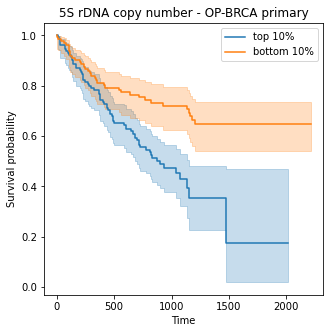

p-value:  0.0001293560949752905


In [17]:
data_ = data.loc[data['Cancer Type'] == 'Breast Carcinoma', ]
data_ = data_.loc[data['Biopsy Site Type'] == 'PRIMARY', ]

data_rank = data_.copy()

feature='5S_dosage_norm' 
N = data_rank.shape[0]
    
data_rank['rank_'+feature] = data_rank[feature].rank(method='first').reindex_like(data_rank[feature])/N

bottom_10 = data_rank['rank_'+feature] <= 0.1
top_10 = data_rank['rank_'+feature] >= 0.9

fig, ax = plt.subplots(1)
fig = plt.gcf()
fig.set_size_inches(5,5)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(data_.loc[top_10]['time'], data_.loc[top_10]['event'], label='top 10%').plot(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(data_.loc[bottom_10]['time'], data_.loc[bottom_10]['event'], label='bottom 10%').plot(ax=ax)

plt.ylabel('Survival probability')
ax.set_xlabel("Time")
plt.title(feature_dict_names[feature] +" - OP-BRCA primary")

plt.savefig('../figures/Fig4b_survival_kaplan-meier.png', bbox_inches='tight')
plt.show()

results = logrank_test(data_.loc[top_10]['time'], data_.loc[bottom_10]['time'], event_observed_A=data_.loc[top_10]['event'], event_observed_B=data_.loc[bottom_10]['event'])

print("p-value: ",results.p_value)

# Fig 4c - Kaplan-Meier 5S rDNA copy number (OP-CRC)

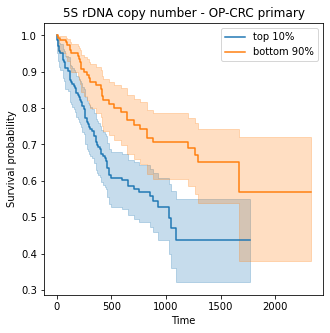

p-value:  0.00027086220824765433


In [4]:
data_ = data.loc[data['Cancer Type'] == 'Colorectal Cancer', ]
data_ = data_.loc[data['Biopsy Site Type'] == 'PRIMARY', ]

data_rank = data_.copy()

feature='5S_dosage_norm' 
N = data_rank.shape[0]
    
data_rank['rank_'+feature] = data_rank[feature].rank(method='first').reindex_like(data_rank[feature])/N

bottom_10 = data_rank['rank_'+feature] <= 0.1
top_10 = data_rank['rank_'+feature] >= 0.9



fig, ax = plt.subplots(1)
fig = plt.gcf()
fig.set_size_inches(5,5)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(data_.loc[top_10]['time'], data_.loc[top_10]['event'], label='top 10%').plot(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(data_.loc[bottom_10]['time'], data_.loc[bottom_10]['event'], label='bottom 90%').plot(ax=ax)

plt.ylabel('Survival probability')
ax.set_xlabel("Time")
plt.title(feature_dict_names[feature] +" - OP-CRC primary")
plt.savefig('../figures/Fig4c_survival_kaplan-meier.png', bbox_inches='tight')
plt.show()

results = logrank_test(data_.loc[top_10]['time'], data_.loc[bottom_10]['time'], event_observed_A=data_.loc[top_10]['event'], event_observed_B=data_.loc[bottom_10]['event'])

print("p-value: ",results.p_value)

# Fig 4d - Kaplan-Meier TCR α Shannon (OP-LUAD)

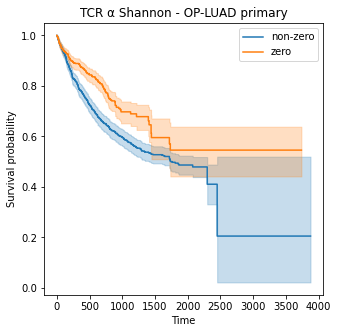

p-value:  6.780613456065048e-07


In [5]:
data_ = data.loc[data['Primary Cancer Diagnosis'] == 'Lung Adenocarcinoma', ]
data_ = data_.loc[data['Biopsy Site Type'] == 'PRIMARY', ]

data_rank = data_.copy()

feature='alphaTCRA' 

N = data_rank.shape[0]
    
data_rank['rank_'+feature] = data_rank[feature].rank(method='first').reindex_like(data_rank[feature])/N


zero = data_[feature] == 0.0
nonzero = data_[feature] != 0.

fig, ax = plt.subplots(1)
fig = plt.gcf()
fig.set_size_inches(5,5)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(data_.loc[nonzero]['time'], data_.loc[nonzero]['event'], label='non-zero').plot(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(data_.loc[zero]['time'], data_.loc[zero]['event'], label='zero').plot(ax=ax)

plt.ylabel('Survival probability')
ax.set_xlabel("Time")
plt.title(feature_dict_names[feature] +" - OP-LUAD primary")
plt.savefig('../figures/Fig4d_survival_kaplan-meier.png', bbox_inches='tight')
plt.show()

results = logrank_test(data_.loc[nonzero]['time'], data_.loc[zero]['time'], event_observed_A=data_.loc[nonzero]['event'], event_observed_B=data_.loc[zero]['event'])

print("p-value: ",results.p_value)

# Fig 4e - Kaplan-Meier TCR α Shannon (OP-BRCA)

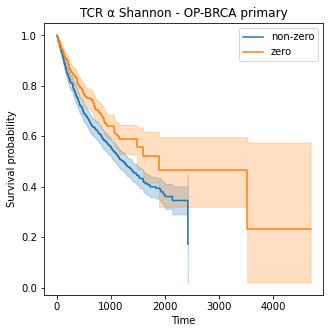

p-value:  0.00125619500308841


In [6]:
data_ = data.loc[data['Cancer Type'] == 'Breast Carcinoma', ]
data_ = data_.loc[data['Biopsy Site Type'] == 'PRIMARY', ]


data_rank = data_.copy()

feature='alphaTCRA' 
N = data_rank.shape[0]
    
data_rank['rank_'+feature] = data_rank[feature].rank(method='first').reindex_like(data_rank[feature])/N

zero = data_[feature] == 0.0
nonzero = data_[feature] != 0.

fig, ax = plt.subplots(1)
fig = plt.gcf()
fig.set_size_inches(5,5)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(data_.loc[nonzero]['time'], data_.loc[nonzero]['event'], label='non-zero').plot(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(data_.loc[zero]['time'], data_.loc[zero]['event'], label='zero').plot(ax=ax)

plt.ylabel('Survival probability')
ax.set_xlabel("Time")
plt.title(feature_dict_names[feature] +" - OP-BRCA primary")

plt.savefig('../figures/Fig4e_survival_kaplan-meier.png', bbox_inches='tight')
plt.show()

results = logrank_test(data_.loc[nonzero]['time'], data_.loc[zero]['time'], event_observed_A=data_.loc[nonzero]['event'], event_observed_B=data_.loc[zero]['event'])

print("p-value: ",results.p_value)

# Kaplan-Meier TCR α Shannon (OP-CRC)

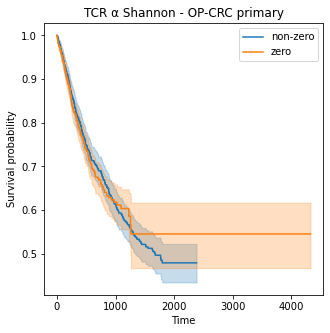

p-value:  0.8643461571428115


In [21]:
data_ = data.loc[data['Cancer Type'] == 'Colorectal Cancer', ]
data_ = data_.loc[data['Biopsy Site Type'] == 'PRIMARY', ]

data_rank = data_.copy()

feature='alphaTCRA' 
N = data_rank.shape[0]
    
data_rank['rank_'+feature] = data_rank[feature].rank(method='first').reindex_like(data_rank[feature])/N


zero = data_[feature] == 0.0
nonzero = data_[feature] != 0.

fig, ax = plt.subplots(1)
fig = plt.gcf()
fig.set_size_inches(5,5)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(data_.loc[nonzero]['time'], data_.loc[nonzero]['event'], label='non-zero').plot(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(data_.loc[zero]['time'], data_.loc[zero]['event'], label='zero').plot(ax=ax)

plt.ylabel('Survival probability')
ax.set_xlabel("Time")
plt.title(feature_dict_names[feature] +" - OP-CRC primary")

plt.show()

results = logrank_test(data_.loc[nonzero]['time'], data_.loc[zero]['time'], event_observed_A=data_.loc[nonzero]['event'], event_observed_B=data_.loc[zero]['event'])

print("p-value: ",results.p_value)